In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime

In [4]:
data = pd.read_csv("../notebooks/data/data_original.csv")

In [3]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,PESSOA_PIPEDRIVE_has_notes,ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente,WHOQOL_Físico_New,WHOQOL_Psicológico_New,WHOQOL_Social_New,WHOQOL_Ambiental_New,COMUNICARE_Problemas Abertos Bool,TWILIO_Data Última Mensagens Inbound Recente,TWILIO_Data Última Mensagens Outbound Recente,TWILIO_Data Última Ligações Outbound Recente
0,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,1,False,4.0,4.0,4.0,4.5,0,False,True,True
1,654,64,82,Rio de Janeiro,Rio de Janeiro,20710-060,2021-04-25,2023-08-02,0,5,...,1,False,3.7,3.2,2.7,3.1,1,True,False,False
2,860,63,80,Paraná,Londrina,86020-410,2022-06-21,2023-09-20,239,3,...,1,False,3.0,3.0,4.0,4.0,1,True,True,False
3,961,63,80,Santa Catarina,Florianópolis,88080-080,2021-07-05,2021-10-01,0,1,...,1,False,2.0,3.0,3.0,3.0,0,False,False,False
4,972,63,82,Minas Gerais,Uberlândia,38400-438,2021-06-28,2023-09-16,0,2,...,1,False,3.9,3.8,4.3,4.1,1,True,True,False


In [4]:
data.columns

Index(['PESSOA_PIPEDRIVE_id_person', 'PESSOA_PIPEDRIVE_id_gender',
       'PESSOA_PIPEDRIVE_id_marrital_status', 'PESSOA_PIPEDRIVE_state',
       'PESSOA_PIPEDRIVE_city', 'PESSOA_PIPEDRIVE_postal_code',
       'PESSOA_PIPEDRIVE_contract_start_date',
       'PESSOA_PIPEDRIVE_contract_end_date',
       'PESSOA_PIPEDRIVE_Canal de Preferência', 'PESSOA_PIPEDRIVE_notes_count',
       'PESSOA_PIPEDRIVE_done_activities_count',
       'FUNIL_ASSINATURA_PIPEDRIVE_id_stage',
       'FUNIL_ASSINATURA_PIPEDRIVE_id_org',
       'FUNIL_ASSINATURA_PIPEDRIVE_status',
       'FUNIL_ASSINATURA_PIPEDRIVE_start_of_service',
       'FUNIL_ASSINATURA_PIPEDRIVE_lost_time',
       'FUNIL_ASSINATURA_PIPEDRIVE_lost_reason',
       'FUNIL_ONBOARDING_PIPEDRIVE_add_time',
       'FUNIL_ONBOARDING_PIPEDRIVE_status',
       'FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_welcome',
       'FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages_first_meeting',
       'FUNIL_ONBOARDING_PIPEDRIVE_stay_in_pipeline_stages

In [5]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'data' is a pandas DataFrame that you have already defined
data['PESSOA_PIPEDRIVE_contract_start_date'] = pd.to_datetime(data['PESSOA_PIPEDRIVE_contract_start_date'])
data['PESSOA_PIPEDRIVE_contract_end_date'] = pd.to_datetime(data['PESSOA_PIPEDRIVE_contract_end_date'])

data['Start_Month_Year'] = data['PESSOA_PIPEDRIVE_contract_start_date'].dt.to_period('M')
data['End_Month_Year'] = data['PESSOA_PIPEDRIVE_contract_end_date'].dt.to_period('M')

start_counts = data['Start_Month_Year'].value_counts().sort_index()
end_counts = data['End_Month_Year'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=start_counts.index.astype(str), y=start_counts, name='Entradas'))
fig.add_trace(go.Bar(x=end_counts.index.astype(str), y=end_counts, name='Saídas'))

fig.update_layout(
    title='Histograma de Entrada e Saída de Assinaturas por Mês',
    xaxis_title='Ano e Mês',
    yaxis_title='Quantidade de Assinaturas',
    barmode='group'
)

# Display the figure using Plotly
fig.show()


In [6]:
from geopy.geocoders import Nominatim

# Criar um geolocalizador
geolocator = Nominatim(user_agent="geoapiExercises")
# Nome da cidade
city_name = "São Paulo"
# Obter a localização da cidade
location = geolocator.geocode(city_name)
# Extrair latitude e longitude
latitude = location.latitude
longitude = location.longitude

In [7]:
latitudes = []
longitudes = []

In [8]:
temp = {}

In [9]:
for i in range(0, len(data)):
    city = data.loc[i, 'PESSOA_PIPEDRIVE_city']
    location = geolocator.geocode(city)
    data.loc[i, 'latitude'] = location.latitude
    data.loc[i, 'longitude'] = location.longitude
    if city not in temp:
        temp[city] = ( data[(data['PESSOA_PIPEDRIVE_city'] == city) & (data['FUNIL_ASSINATURA_PIPEDRIVE_status'] == "lost")].shape[0] ) / (data[data['PESSOA_PIPEDRIVE_city'] == city].shape[0])

    data.loc[i, 'weight'] = temp[city]

In [10]:
data['FUNIL_ONBOARDING_PIPEDRIVE_status'].value_counts()

FUNIL_ONBOARDING_PIPEDRIVE_status
won     578
lost    259
open     97
Name: count, dtype: int64

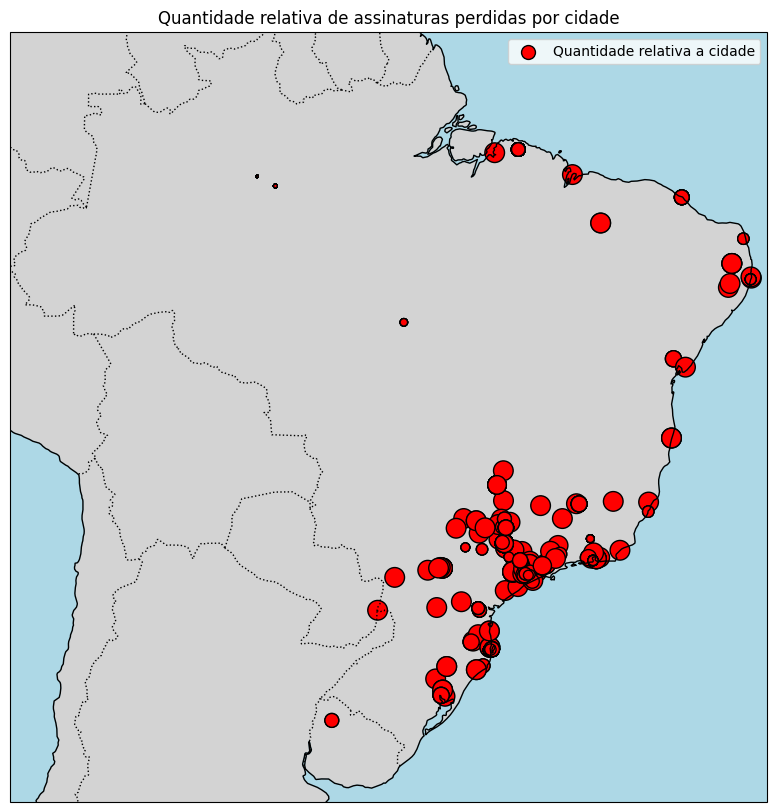

In [11]:
import matplotlib.pyplot as plt


# Definindo os limites geográficos do Brasil
lat_min, lat_max = -34, 5
lon_min, lon_max = -74, -34

# Filtrando as cidades dentro dos limites do Brasil
data = data[(data['latitude'].between(lat_min, lat_max)) & 
               (data['longitude'].between(lon_min, lon_max))]

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Your data filtering remains the same

# Creating the map using Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adding features to the map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Plotting the points with sizes based on the 'weight'
# Adding edgecolor for borders and specifying the linewidths
scatter = plt.scatter(data['longitude'], data['latitude'], s=data['weight'] * 200,
                      color='red', edgecolor='black', linewidths=1,
                      transform=ccrs.PlateCarree(), label='Quantidade relativa a cidade')

# Adding a legend
plt.legend()
plt.title('Quantidade relativa de assinaturas perdidas por cidade')

plt.show()

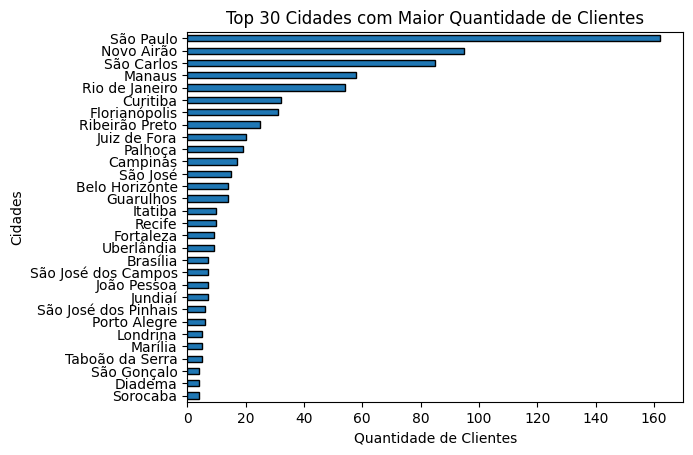

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja o seu DataFrame
# Contar a frequência de cada cidade
contagem_cidades = data['PESSOA_PIPEDRIVE_city'].value_counts()

# Você pode escolher mostrar apenas as top N cidades
N = 30  # Por exemplo, as 20 cidades com mais clientes
contagem_cidades = contagem_cidades.head(N)

# Criar um gráfico de barras horizontal
contagem_cidades.plot(kind='barh', edgecolor='black')

# Adicionar títulos e rótulos
plt.title('Top 30 Cidades com Maior Quantidade de Clientes')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Cidades')

# Inverter o gráfico para mostrar a cidade com mais clientes no topo
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()


In [13]:
PESSOA_PIPEDRIVE_city

NameError: name 'PESSOA_PIPEDRIVE_city' is not defined